In [ ]:
# This takes a model spectrum, integrates it over a filter curve

# Created 2020 Feb. 26 by E.S.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from svo_filters import svo

In [2]:
NB405 = svo.Filter('Paranal.NACO.NB405', nbins=15)

Bandpass trimmed to 3.98778 um - 4.12422 um
1 bins of 65 pixels each.


In [30]:
H_band = svo.Filter('2MASS.H')

In [31]:
H_band.info()

     Attributes                                                    Values                                             
-------------------- -------------------------------------------------------------------------------------------------
                Band H                                                                                                
CalibrationReference http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2003AJ....126.1090C&db_key=AST           
            Facility 2MASS                                                                                            
FilterProfileService ivo://svo/fps                                                                                    
              MagSys Vega                                                                                             
           PhotCalID 2MASS/2MASS.H/Vega                                                                               
          PhotSystem 2MASS                      

In [3]:
NB405.info()

     Attributes                                                         Values                                                   
-------------------- ------------------------------------------------------------------------------------------------------------
            Comments />                                                                                                          
            Facility Paranal                                                                                                     
FilterProfileService ivo://svo/fps                                                                                               
          Instrument NACO                                                                                                        
              MagSys Vega                                                                                                        
           PhotCalID Paranal/NACO.NB405/Vega                                              

In [29]:
# Get a spectrum

spec_df = pd.read_csv('data/model_spec_teff_7750_logg_4_feh_0.txt', names=["wavel","flux"], 
                  delim_whitespace=True, skiprows=18)
spec_df["dummy_col"] = 1 # add dummy column of 1
spec = spec_df.rename_axis("ID").values

spec_junk = np.genfromtxt('data/vega.txt')

In [20]:
spec

array([[1.81700e+02, 0.00000e+00, 1.00000e+00],
       [1.93900e+02, 0.00000e+00, 1.00000e+00],
       [2.05000e+02, 0.00000e+00, 1.00000e+00],
       ...,
       [1.20000e+06, 7.14139e-02, 1.00000e+00],
       [1.40000e+06, 3.83533e-02, 1.00000e+00],
       [1.60000e+06, 2.23801e-02, 1.00000e+00]])

In [19]:
spec_junk

array([[9.00092e-02, 1.68166e-17, 1.00000e+00],
       [9.03057e-02, 1.82567e-17, 1.00000e+00],
       [9.06022e-02, 1.98043e-17, 1.00000e+00],
       ...,
       [6.49845e+00, 6.16890e-13, 1.00000e+00],
       [6.49875e+00, 6.16725e-13, 1.00000e+00],
       [6.49904e+00, 6.16561e-13, 1.00000e+00]])

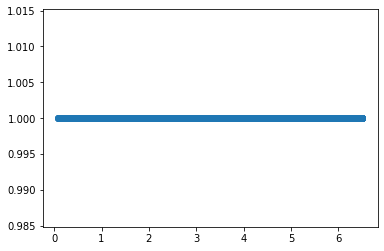

In [17]:
plt.scatter(spec_junk[:,0],spec_junk[:,2])
plt.show()

In [23]:
# Apply the filter

filtered = NB405.apply(spec_junk, plot=True)

In [32]:
filtered_junk = H_band.apply(spec_junk, plot=True)

In [28]:
NB405.rsr.flatten()

array([3.988, 3.99 , 3.992, 3.994, 3.996, 3.998, 4.   , 4.002, 4.004,
       4.006, 4.008, 4.01 , 4.012, 4.014, 4.016, 4.018, 4.02 , 4.022,
       4.024, 4.026, 4.028, 4.03 , 4.04 , 4.042, 4.044, 4.046, 4.048,
       4.05 , 4.052, 4.054, 4.056, 4.058, 4.06 , 4.062, 4.064, 4.066,
       4.068, 4.07 , 4.072, 4.074, 4.076, 4.078, 4.08 , 4.082, 4.084,
       4.086, 4.088, 4.09 , 4.092, 4.094, 4.096, 4.098, 4.1  , 4.102,
       4.104, 4.106, 4.108, 4.11 , 4.112, 4.114, 4.116, 4.118, 4.12 ,
       4.122, 4.124, 0.01 , 0.01 , 0.01 , 0.02 , 0.02 , 0.02 , 0.03 ,
       0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.1  , 0.14 , 0.18 , 0.26 ,
       0.3  , 0.36 , 0.42 , 0.5  , 0.55 , 0.6  , 0.8  , 0.81 , 0.82 ,
       0.83 , 0.85 , 0.87 , 0.87 , 0.87 , 0.87 , 0.89 , 0.88 , 0.88 ,
       0.88 , 0.87 , 0.85 , 0.83 , 0.81 , 0.8  , 0.74 , 0.69 , 0.64 ,
       0.6  , 0.52 , 0.44 , 0.36 , 0.31 , 0.24 , 0.2  , 0.16 , 0.13 ,
       0.1  , 0.09 , 0.08 , 0.06 , 0.04 , 0.03 , 0.03 , 0.02 , 0.02 ,
       0.03 , 0.02 ,

In [53]:
spec

array([[9.00092e-02, 1.68166e-17, 1.00000e+00],
       [9.03057e-02, 1.82567e-17, 1.00000e+00],
       [9.06022e-02, 1.98043e-17, 1.00000e+00],
       ...,
       [6.49845e+00, 6.16890e-13, 1.00000e+00],
       [6.49875e+00, 6.16725e-13, 1.00000e+00],
       [6.49904e+00, 6.16561e-13, 1.00000e+00]])

In [54]:
spec = np.genfromtxt('data/model_spec_teff_7750_logg_4_feh_0.txt', names=["wavel","flux"], 
                   skip_header=10)

In [55]:
np.shape(spec)

(1160,)

In [56]:
spec

array([(9.09e+01, 0.       ), (1.02e+02, 0.       ),
       (1.14e+02, 0.       ), ..., (1.20e+06, 0.0714139),
       (1.40e+06, 0.0383533), (1.60e+06, 0.0223801)],
      dtype=[('wavel', '<f8'), ('flux', '<f8')])

In [57]:
from io import StringIO

In [ ]:
spec = np.genfromtxt('data/model_spec_teff_7750_logg_4_feh_0.txt', names=["wavel","flux"], 
                   skip_header=10)